# Fuzzy Run Challenge


In [1]:
import pandas as pd
import seaborn as sns
from scipy.integrate import simps
from numpy import trapz

## Load data

In [2]:
dfMatt = pd.read_csv("../data/matt.csv")
dfMisha = pd.read_csv("../data/misha.csv")
dfTom = pd.read_csv("../data/tom.csv")

## Plot acceleration

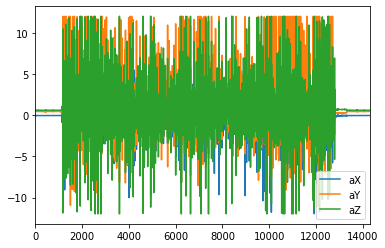

In [3]:
dfTom.loc[:, ["aX", "aY", "aZ"]].plot()

## Plot shor segment

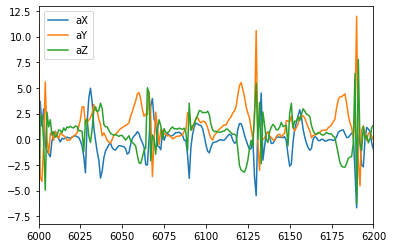

In [4]:
dfTom.loc[6000:6200, ["aX", "aY", "aZ"]].plot()

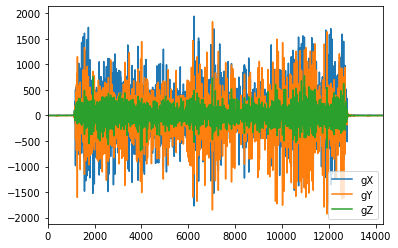

In [5]:
dfTom.loc[:, ["gX", "gY", "gZ"]].plot()

In [6]:
dfTom.head()

,time,aX,aY,aZ,gX,gY,gZ
0,0,-0.047607,0.443115,0.590332,3.356934,-3.662109,-3.417969
1,10,-0.044678,0.443115,0.591431,3.356934,-3.417969,-3.479004
2,20,-0.056030,0.439087,0.593628,3.295898,-2.807617,-3.662109
3,30,-0.052734,0.439087,0.592163,3.417969,-3.417969,-3.540039
4,40,-0.049438,0.440552,0.587769,3.479004,-3.601074,-3.417969


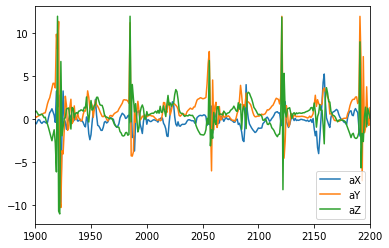

In [7]:
dfTom.loc[1900:2200, ["aX", "aY", "aZ"]].plot()

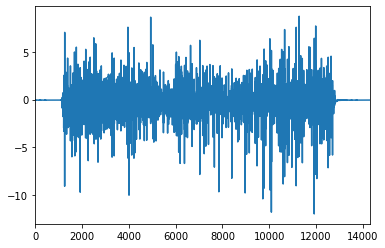

In [8]:
dfTom['aX'].plot()

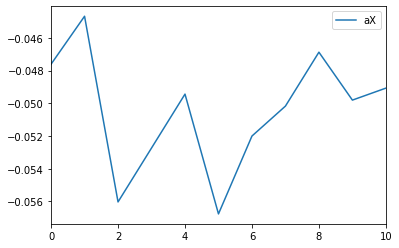

In [9]:
dfTom.loc[0:10, ["aX"]].plot()

In [10]:
dfTom['time'] = dfTom['time'].apply(lambda x: x*0.001)

In [11]:
dfTomaX = dfTom.drop(['aY', 'aZ', 'gX', 'gY', 'gZ'], axis=1)

In [12]:
velocity_area = trapz(dfTomaX, dx=0.001)
velocity_area

array([-2.38037100e-05, -1.73388670e-05, -1.80151362e-05, ...,
        7.14769287e-02,  7.14819287e-02,  7.14874780e-02])

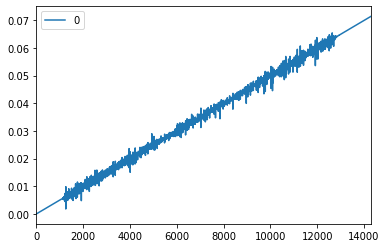

In [13]:
df_velocity = pd.DataFrame(data=velocity_area)
df_velocity.plot()

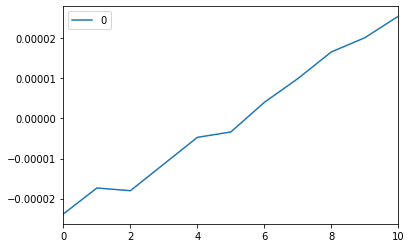

In [14]:
df_velocity.loc[0:10, [0]].plot()

In [15]:
time = dfTomaX["time"]
df_velocity = df_velocity.join(time)

In [16]:
df_velocity.head()

,0,time
0,-0.000024,0.00
1,-0.000017,0.01
2,-0.000018,0.02
3,-0.000011,0.03
4,-0.000005,0.04


In [17]:
distance_area = trapz(df_velocity, dx=5)
distance_area

array([-5.95092750e-05,  2.49566528e-02,  4.99549622e-02, ...,
        3.57678692e+02,  3.57703705e+02,  3.57728719e+02])

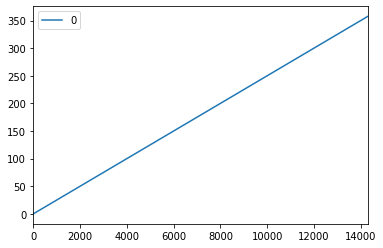

In [18]:
df_distance = pd.DataFrame(data=distance_area)
df_distance.plot()

In [19]:
area_last = trapz(df_velocity[0], dx=0.001)
area_last

0.510708834798721

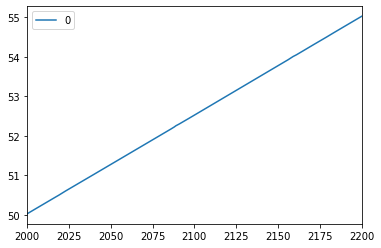

In [20]:
df_distance.loc[2000:2200, [0]].plot()

In [21]:
df_distance.head()

,0
0,-0.000060
1,0.024957
2,0.049955
3,0.074972
4,0.099988


In [22]:
dfTomFinal = df_distance
dfTomFinal[1] = df_velocity[0]
dfTomFinal[2] = dfTom['aX']
dfTomFinal = dfTomFinal.rename(columns={0: "distance", 1: "velocity", 2:"acceleration"})

In [23]:
dfTomFinal.head()

,distance,velocity,acceleration
0,-0.000060,-0.000024,-0.047607
1,0.024957,-0.000017,-0.044678
2,0.049955,-0.000018,-0.056030
3,0.074972,-0.000011,-0.052734
4,0.099988,-0.000005,-0.049438


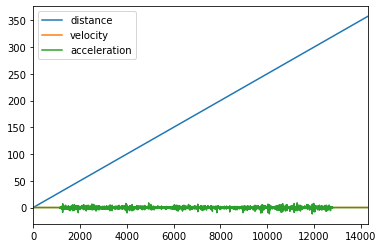

In [24]:
dfTomFinal.plot()

In [25]:
dfTomFinal.head()

,distance,velocity,acceleration
0,-0.000060,-0.000024,-0.047607
1,0.024957,-0.000017,-0.044678
2,0.049955,-0.000018,-0.056030
3,0.074972,-0.000011,-0.052734
4,0.099988,-0.000005,-0.049438


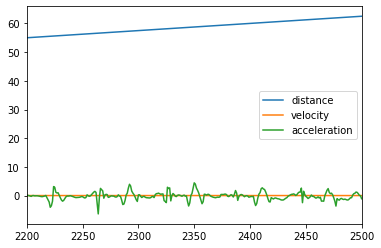

In [26]:
dfTomFinal.loc[2200:2500].plot()

In [27]:
distTomX = dfTomFinal.iloc[-1]['distance']
distTomX

357.72871869506815